### 实现逻辑回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y<2, :2]
y = y[y<2]

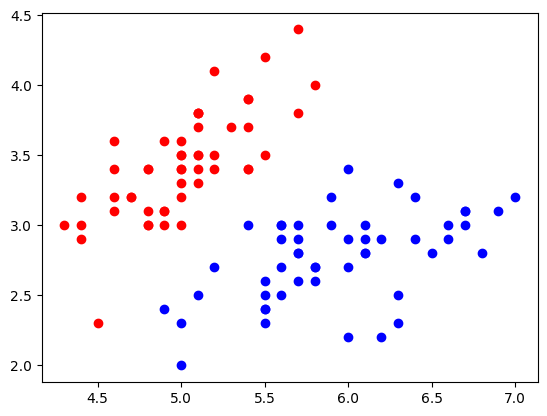

In [4]:
plt.scatter(X[y==0, 0], X[y==0,1], color="red")
plt.scatter(X[y==1, 0], X[y==1,1], color="blue")

### 使用逻辑回归

In [5]:
from model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

In [6]:
from LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [7]:
log_reg.score(X_test, y_test)

1.0

In [9]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [10]:
log_reg.interception_

-0.6937719272911227

In [11]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_) / log_reg.coef_[1]

In [12]:
x1_plot = np.linspace(4, 8, 1000)
x2_plot = x2(x1_plot)

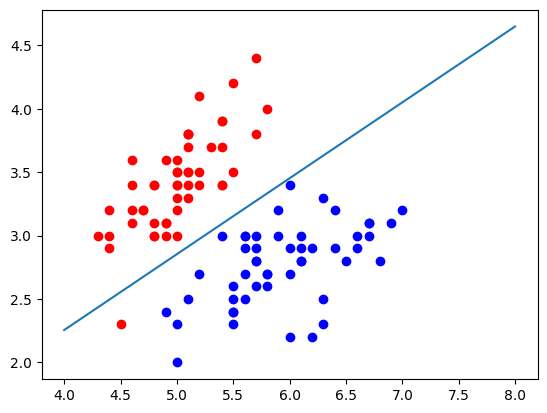

In [14]:
plt.scatter(X[y==0, 0], X[y==0,1], color="red")
plt.scatter(X[y==1, 0], X[y==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

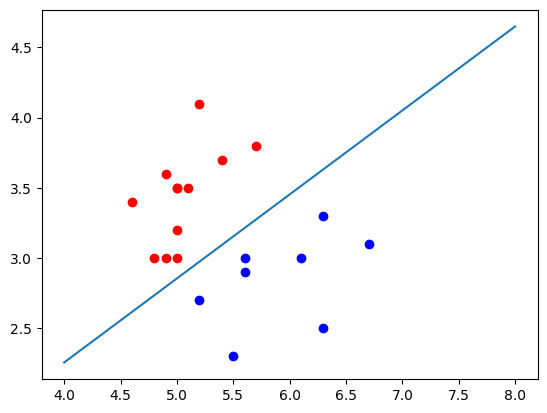

In [15]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1,1], color="blue")
plt.plot(x1_plot, x2_plot)
plt.show()

In [49]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF0A0A', '#FFF59D', '#90CAD9'])
    
    plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)

C:\Users\wh\AppData\Local\Temp\ipykernel_18920\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


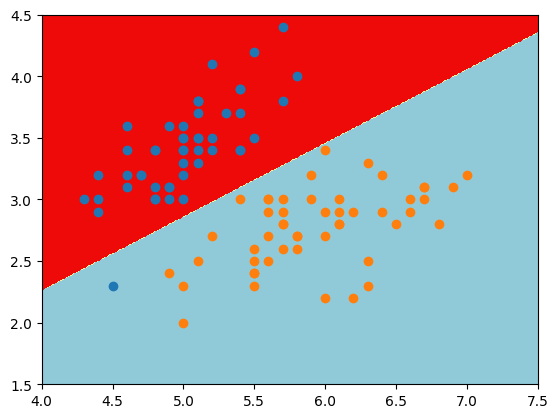

In [50]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()

### kNN的决策边界

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
knn_clf.score(X_test, y_test)

1.0

C:\Users\wh\AppData\Local\Temp\ipykernel_18920\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


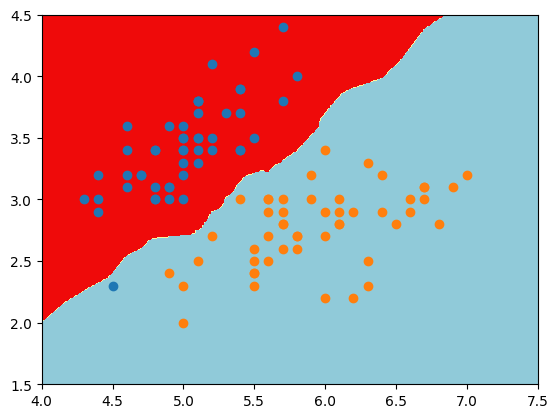

In [52]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0,1])
plt.scatter(X[y==1, 0], X[y==1,1])
plt.show()

In [59]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier()

C:\Users\wh\AppData\Local\Temp\ipykernel_18920\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


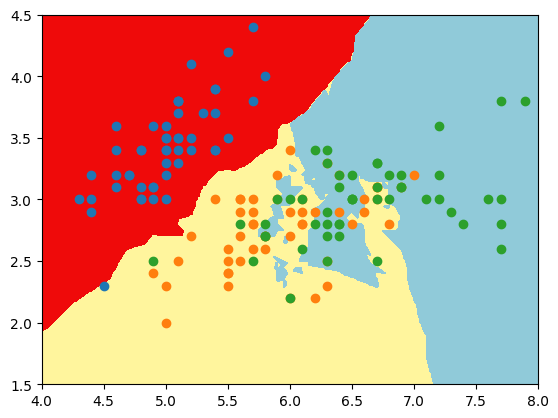

In [60]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2,1])
plt.show()

In [61]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:,:2], iris.target)

KNeighborsClassifier(n_neighbors=50)

C:\Users\wh\AppData\Local\Temp\ipykernel_18920\812169963.py:14: UserWarning: linewidths is ignored by contourf
  plt.contourf(x0, x1, zz, linewidths=5, cmap=custom_cmap)


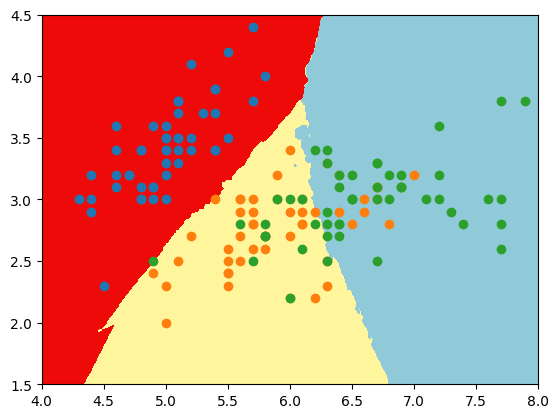

In [62]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(iris.data[iris.target==0, 0], iris.data[iris.target==0,1])
plt.scatter(iris.data[iris.target==1, 0], iris.data[iris.target==1,1])
plt.scatter(iris.data[iris.target==2, 0], iris.data[iris.target==2,1])
plt.show()